# Script: 2 - cleaned_data_overview
<h4><span style="color:blue">Juan José Hoyos Urcué</span></h4>

## Dataset and python libraries upload

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import util_exploration as util
import random


file_name = "cleaned_renamed.xlsx"
data = pd.read_excel(file_name, na_values = ["999.0","888.0","999","888"])

In [2]:
# dataset preview

data.head()

,gender,ethnicity,age,infection_department,weight,height,evolution_time,number_active_injuries,ulcer_horizontal,ulcer_vertical,ulcer_area,injury_horizontal,injury_vertical,injury_area,prescribed_medication,glucantime_dosage,cure_or_fail
0,1,1,22,Narino,58.6,176,2,1,11.6,6.1,222.3,14.2,9.9,441.6,1,14.0,0.0
1,2,2,19,Choco,59.0,145,6,1,32.6,39.2,4014.7,55.3,56.6,9833.1,1,14.5,2.0
2,1,1,20,Narino,62.0,158,3,6,7.0,4.2,92.4,14.1,8.7,385.4,1,15.0,1.0
3,2,1,18,Narino,77.0,163,6,6,9.0,6.2,175.3,12.5,10.0,392.7,1,19.0,1.0
4,1,2,35,Narino,53.9,158,3,1,11.8,10.0,370.7,14.4,12.0,542.9,1,13.0,0.0


## Special NaN verifications

In [3]:
# There are columns where number 8 means NaN
def na_8(column):
    print(column,"-->",len(data[data[column] == 8]))

na_8("gender")
na_8("ethnicity")

# if 0 it means no NaNs values for this columns

gender --> 0
ethnicity --> 0


## Dataset Shape

In [4]:
rows, cols = data.shape
print("{} rows and {} columns .".format(rows, cols))

29 rows and 17 columns .


## Datatypes 

In [5]:
data. dtypes

gender                      int64
ethnicity                   int64
age                         int64
infection_department       object
weight                    float64
height                      int64
evolution_time              int64
number_active_injuries      int64
ulcer_horizontal          float64
ulcer_vertical            float64
ulcer_area                float64
injury_horizontal         float64
injury_vertical           float64
injury_area               float64
prescribed_medication       int64
glucantime_dosage         float64
cure_or_fail              float64
dtype: object

## Initial Statistical Description

In [6]:
data.describe()

,gender,ethnicity,age,weight,height,evolution_time,number_active_injuries,ulcer_horizontal,ulcer_vertical,ulcer_area,injury_horizontal,injury_vertical,injury_area,prescribed_medication,glucantime_dosage,cure_or_fail
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,27.000000,24.000000
mean,1.275862,1.758621,31.379310,72.968966,166.206897,6.862069,2.344828,20.631034,17.782759,1976.668966,31.213793,29.034483,4464.627586,1.068966,17.092593,0.666667
std,0.454859,0.872401,9.259797,13.269813,9.784752,5.005170,1.778359,19.372976,16.105169,2816.721733,25.201342,23.304388,5583.489947,0.257881,2.649518,0.868115
min,1.000000,1.000000,18.000000,53.900000,145.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,12.600000,1.000000,13.000000,0.000000
25%,1.000000,1.000000,24.000000,59.000000,160.000000,4.000000,1.000000,6.200000,5.900000,92.400000,12.500000,8.700000,385.400000,1.000000,14.000000,0.000000
50%,1.000000,1.000000,30.000000,75.600000,165.000000,4.000000,2.000000,15.000000,12.000000,555.100000,27.900000,23.800000,2384.100000,1.000000,17.000000,0.000000
75%,2.000000,3.000000,37.000000,83.300000,174.000000,8.000000,3.000000,27.000000,24.700000,1950.900000,44.000000,46.000000,6358.600000,1.000000,20.000000,1.000000
max,2.000000,3.000000,51.000000,105.000000,183.000000,21.000000,8.000000,75.400000,56.400000,9638.900000,87.100000,80.000000,19756.300000,2.000000,20.000000,3.000000


In [7]:
# mode per variable

pd.DataFrame(data.mode().iloc[0])

,0
gender,1.0
ethnicity,1.0
age,20.0
infection_department,Narino
weight,58.6
height,174.0
evolution_time,4.0
number_active_injuries,1.0
ulcer_horizontal,0.0
ulcer_vertical,0.0


## Missing Values

### By rows

In [8]:
by_row = list()
for i in range(len(data.index)) :
    num_na = data.iloc[i].isnull().sum()
    
    if num_na > 0:
        by_row.append(("Row "+str(i),num_na))

pd.DataFrame(by_row, columns = ["Row","Number of NaN values"]).style.hide_index()

Row,Number of NaN values
Row 9,1
Row 14,1
Row 24,1
Row 25,1
Row 26,1
Row 27,1
Row 28,1


### By columns

In [9]:
columns_na = data.columns[data.isna().any()].to_list()
by_col = list()

for col in columns_na:
    info = (col,data[col].isna().sum())
    by_col.append(info)
    
pd.DataFrame(by_col, columns = ["Variable","Number of NaN values"]).style.hide_index()

Variable,Number of NaN values
glucantime_dosage,2
cure_or_fail,5


## Trend of Demographic Variables

<AxesSubplot:>

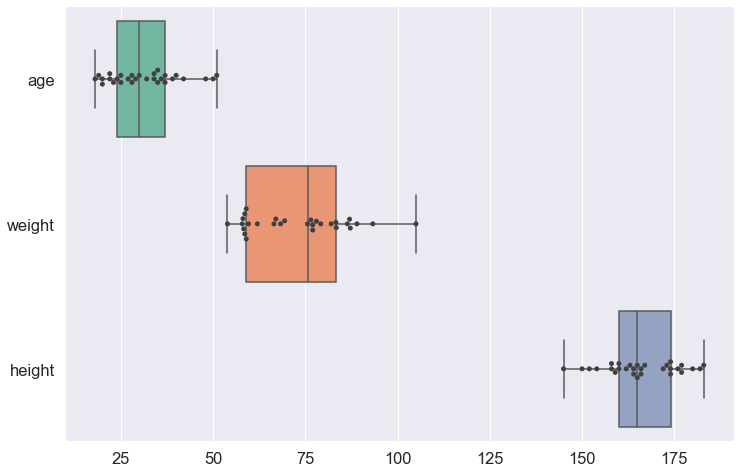

In [10]:
demografico = data[['age', 'weight','height']]
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)
sns.boxplot(data=demografico, orient="h", palette="Set2")
sns.swarmplot(data=demografico, orient="h", color=".25")

## Trend of Variables Associated with Injury

evolution_time


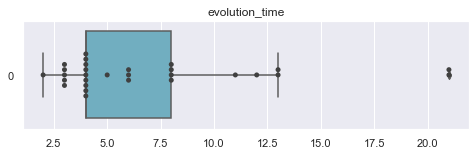

number_active_injuries


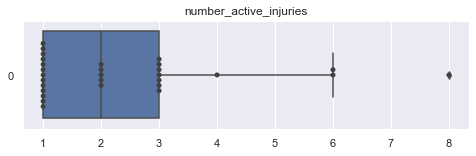

ulcer_horizontal


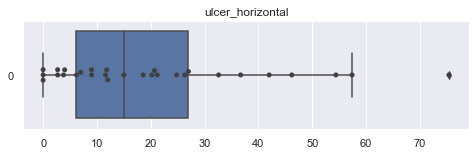

ulcer_vertical


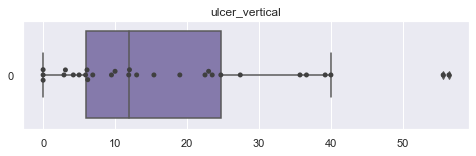

ulcer_area


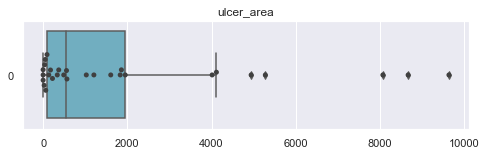

injury_horizontal


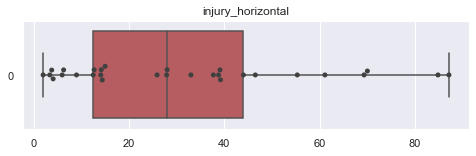

injury_vertical


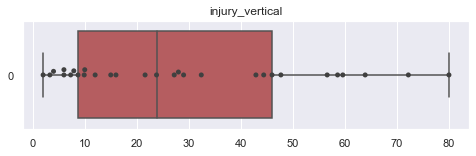

injury_area


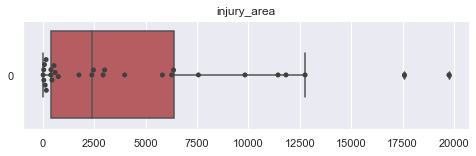

In [11]:
to_delete = ['gender','ethnicity', 'infection_department','glucantime_dosage',
             'cure_or_fail','age', 'weight','height',
            "prescribed_medication"]
others = list(data.columns)

for elem in to_delete:
    others.remove(elem)

colors = ["b","g","r","c","m"]
for elem in others:
    print(elem)
    sns.set(rc={'figure.figsize':(8,2)})
    sns.boxplot(data = data[elem], orient = "h", color = random.choice(colors))
    sns.swarmplot(data = data[elem], orient = "h", color = ".25")
    plt.title(elem)
    plt.show()

## Correlation Matrix

<AxesSubplot:>

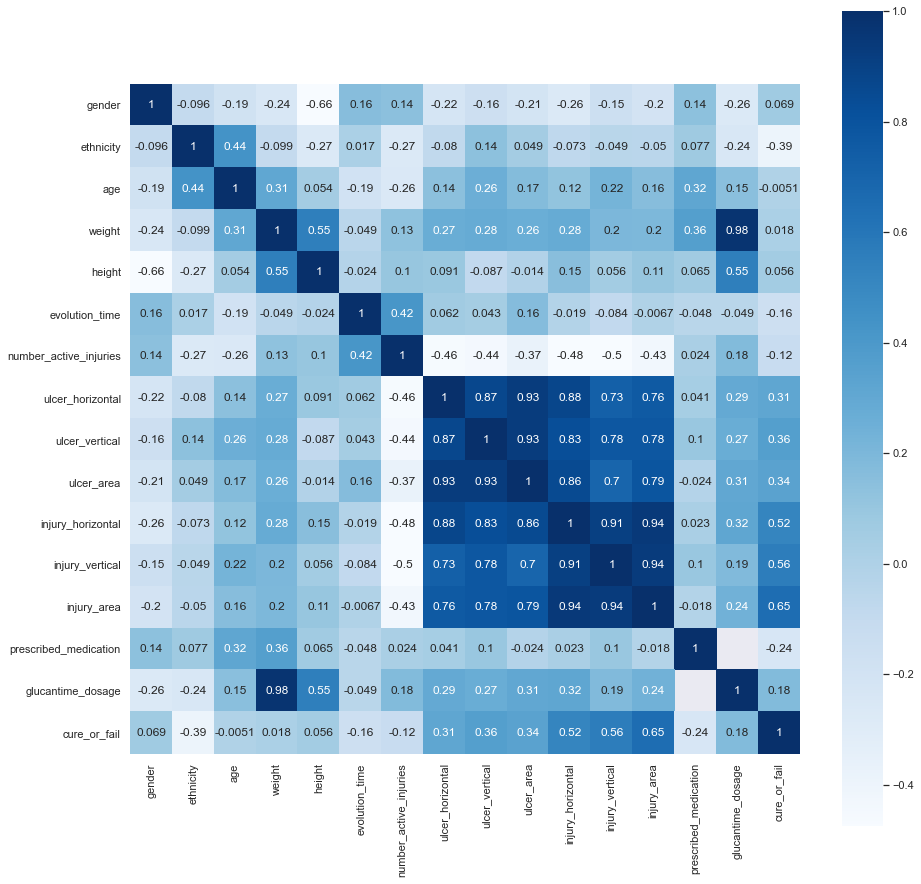

In [12]:
size = 15
plt.figure(figsize = (size,size))
sns.heatmap(data.corr(), square = True, annot=True, cmap = "Blues", robust = True)

## Pairs of Variables with Correlation greater 0.85

In [13]:
correlated = util.show_correlated(data,0.85)
first = list(set([to_delete[i][0] for i in range(len(to_delete))]))
correlated

,VAR_1,VAR_2,CORR
0,weight,glucantime_dosage,0.976073
1,ulcer_horizontal,ulcer_vertical,0.870769
2,ulcer_horizontal,ulcer_area,0.929444
3,ulcer_horizontal,injury_horizontal,0.877656
4,ulcer_vertical,ulcer_area,0.928906
5,ulcer_area,injury_horizontal,0.855457
6,injury_horizontal,injury_vertical,0.907958
7,injury_horizontal,injury_area,0.944400
8,injury_vertical,injury_area,0.935635


## Distribution of the Target Variable

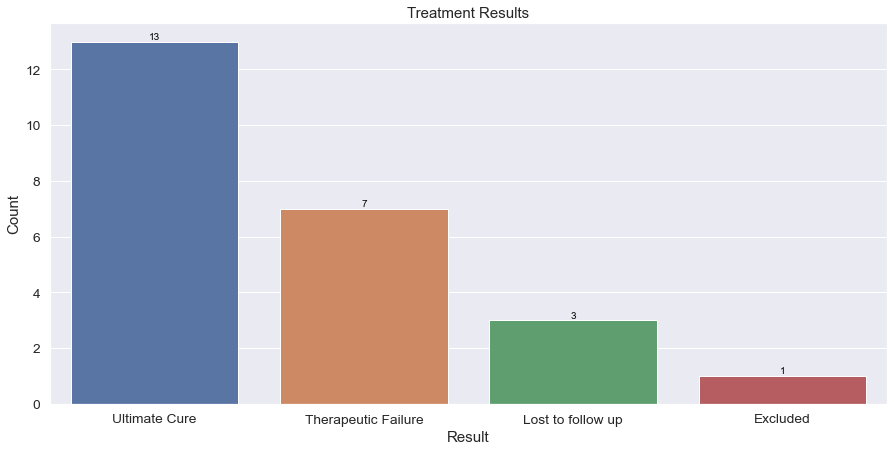

In [14]:
labels = ["Ultimate Cure","Therapeutic Failure","Lost to follow up", "Excluded"]
values = [data["cure_or_fail"].value_counts()[i] for i in range(len(labels))]

target_data = pd.DataFrame(zip(labels,values), columns = ["Result", "Count"])
util.plot_class_distr(target_data)

Summarizing all the information provided by each activity, the following pre-processing
plan was established:


    - (a) Eliminate non-useful records based on the target variable (Nan, excluded patients, loss
          patients tracking and non-Glucantime patients treated ).
          
    - (b) Transform infection_department into numerical scale.
    
    - (c) Eliminate one of the attributes for each pair of attributes that have a correlation coefficient greater than 0.85.

    - (d) Normalize the data set.